<center><h1>Hong_Seungil_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [15]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ARFF file
bin_cl = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')

Get the Vertebral Column Data Set

In [16]:
# Create the DataFrame
df_bin = pd.DataFrame(bin_cl[0])
print(df_bin)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis        class  
0        98.672917                 -0.2

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

In [17]:
# Decode byte-strings in the 'class' column to regular strings
df_bin['class'] = df_bin['class'].str.decode('utf-8')
print(df_bin)


     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis     class  
0        98.672917                 -0.2544

In [18]:

# Create a dictionary to map the text values to the numeric values
mapping = {'Abnormal': 1, 'Normal': 0}
mapping


{'Abnormal': 1, 'Normal': 0}

In [19]:
# Add the 'class' column to the new DataFrame
df_bin['class'] = df_bin['class'].map(mapping)

# Print the resulting DataFrame
df_bin

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


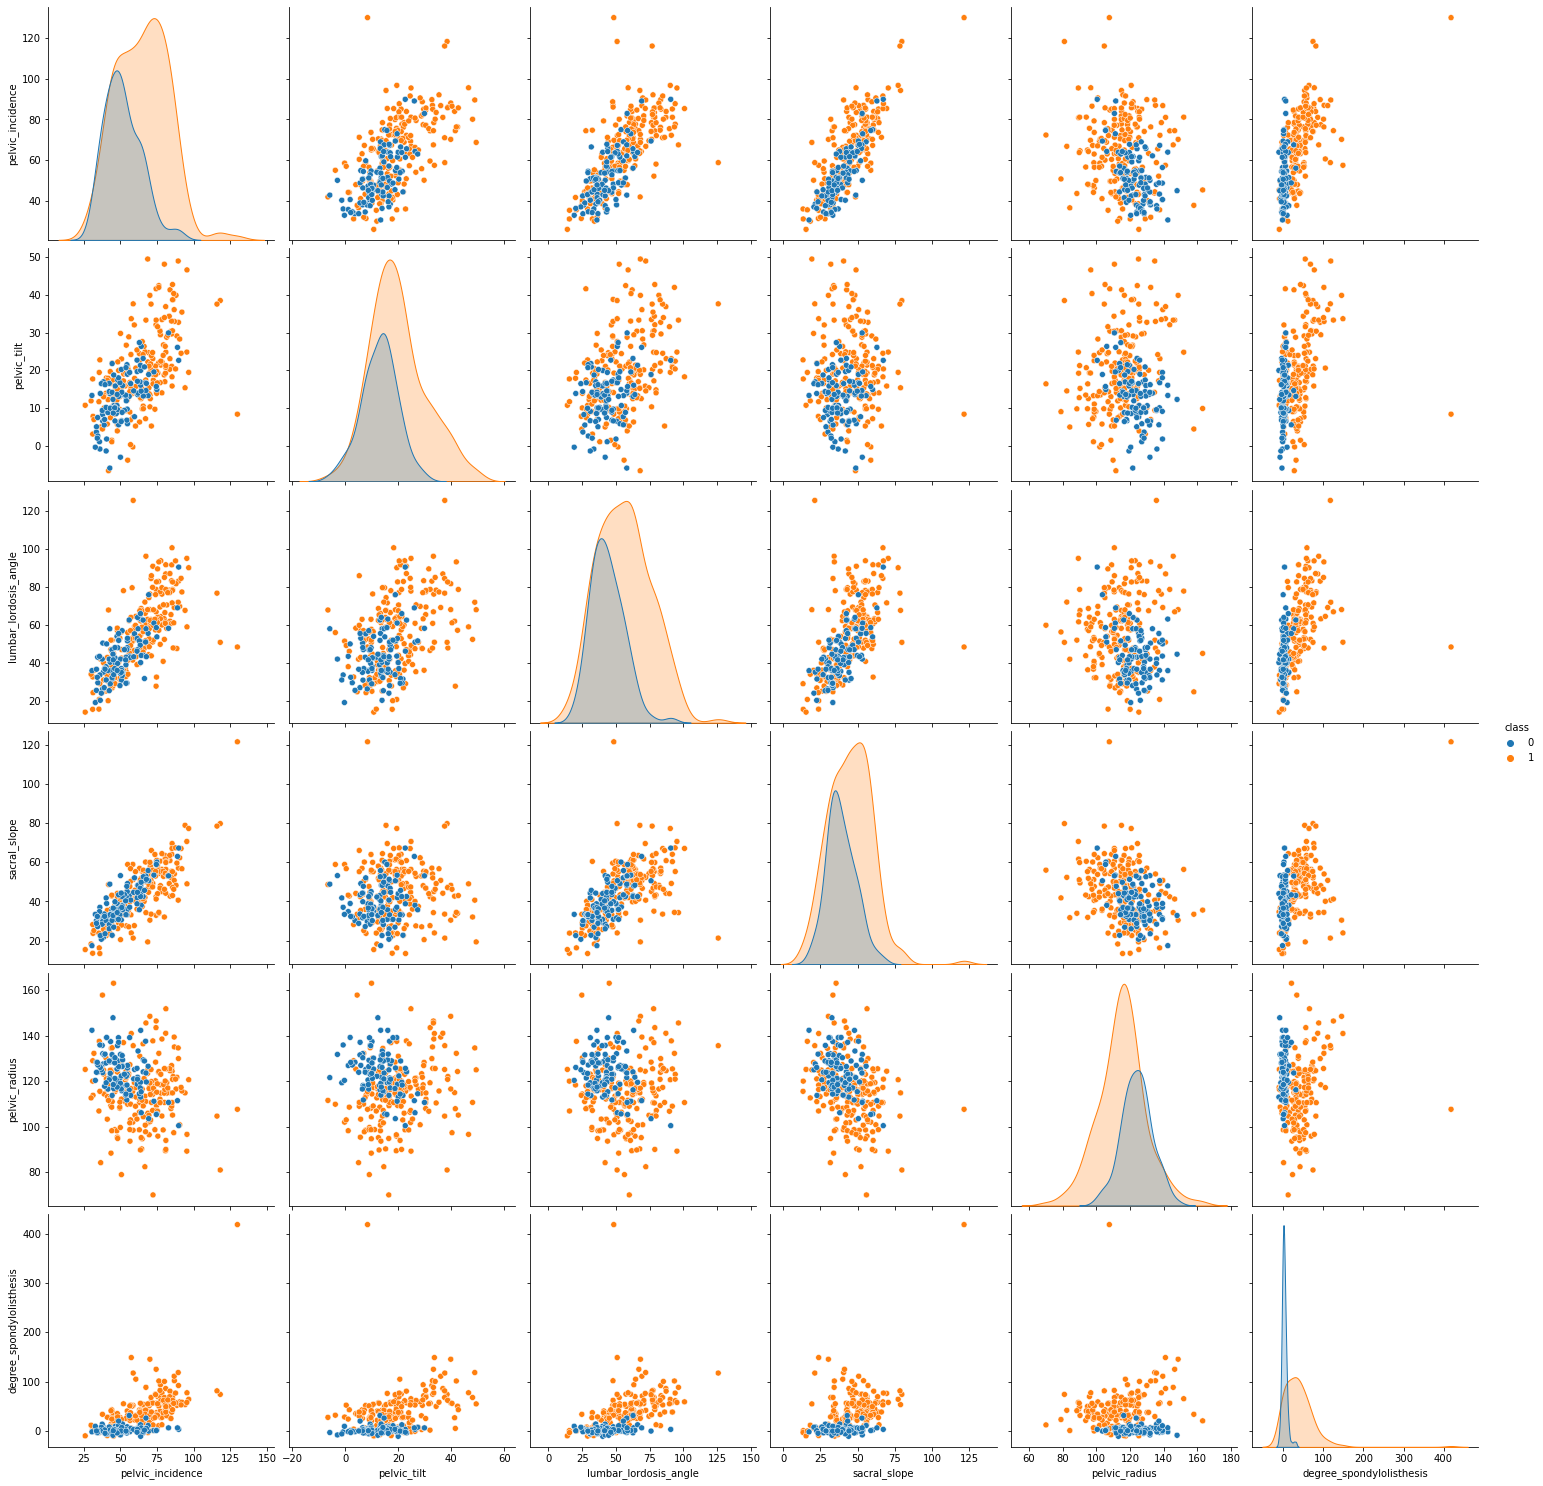

In [20]:
#I wasn't sure which scatterplot should be generated so makeing 2 different typs of plotting prompt (pairplot and scatterplot)
sns.pairplot(df_bin, hue='class', height=3.5)

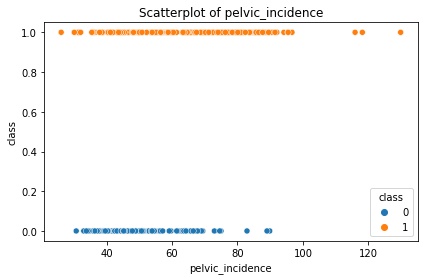

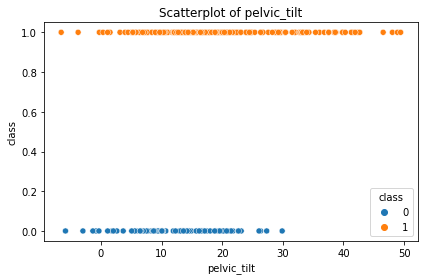

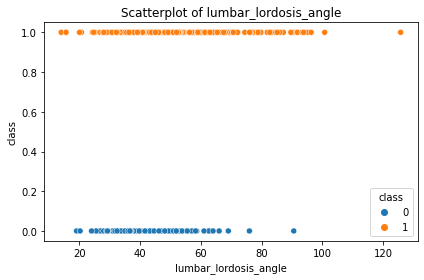

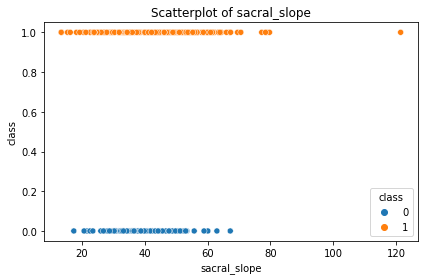

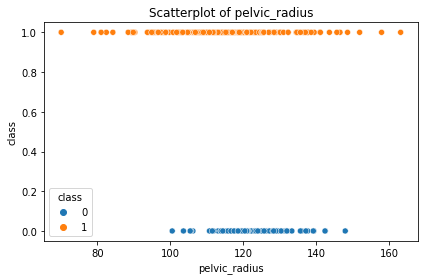

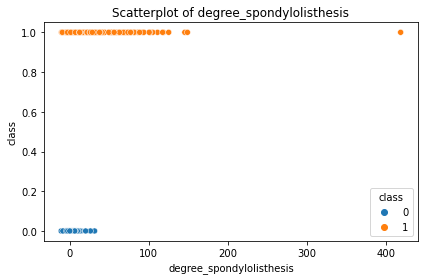

In [21]:
independent_vars = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

# Loop through the independent variables and create scatterplots
for var in independent_vars:
    sns.scatterplot(x=var, y='class', data=df_bin, hue='class')  # 'class' should be the dependent variable
    plt.title(f'Scatterplot of {var}')
    plt.xlabel(var)
    plt.ylabel('class')
    plt.tight_layout()
    plt.show()

#### ii. Boxplots

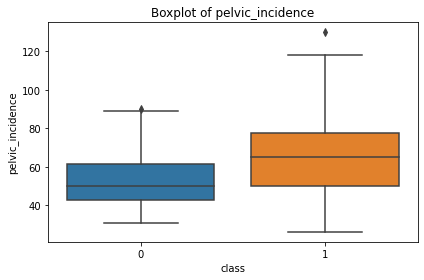

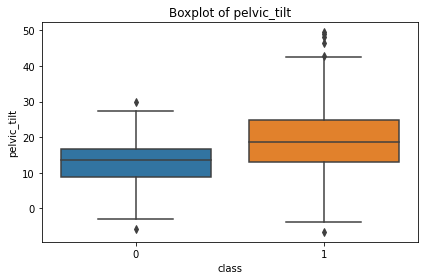

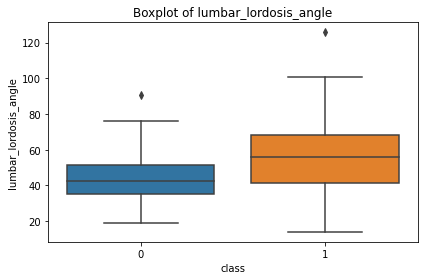

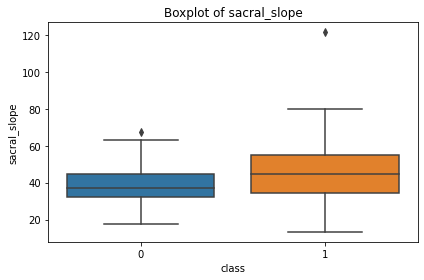

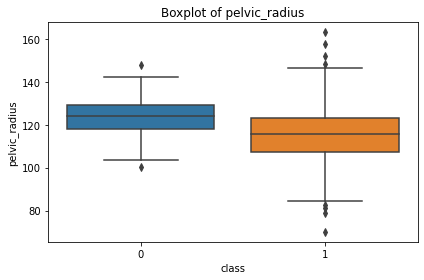

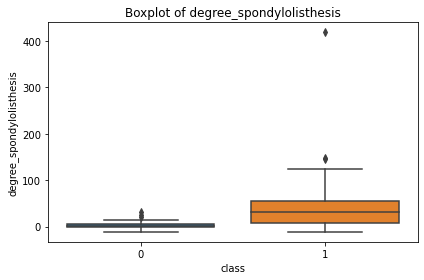

In [22]:
# Create boxplots for each independent variable
for var in independent_vars:
    sns.boxplot(x='class', y=var, data=df_bin)
    plt.title(f'Boxplot of {var}')
    plt.xlabel('class')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

#### iii. Split Data Set

In [23]:
# Select rows where 'class' is 0 (Class 0) and take the first 70 rows
cl0_tr = df_bin[df_bin['class'] == 0].iloc[:70]

# Select rows where 'class' is 1 (Class 1) and take the first 140 rows
cl1_tr = df_bin[df_bin['class'] == 1].iloc[:140]

# Concatenate the two DataFrames to create the final training set
tr_set = pd.concat([cl0_tr, cl1_tr])

# Display the training set
tr_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [24]:
# Select rows where 'class' is 0 (Class 0) and skip the first 70 rows (remaining data)
cl0_te = df_bin[df_bin['class'] == 0].iloc[70:]

# Select rows where 'class' is 1 (Class 1) and skip the first 140 rows (remaining data)
cl1_te = df_bin[df_bin['class'] == 1].iloc[140:]

# Concatenate the two DataFrames to create the final test set
te_set = pd.concat([cl0_te, cl1_te])
te_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


### (c) Classification

#### i. Euclidean Metric

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### ii. Test Data

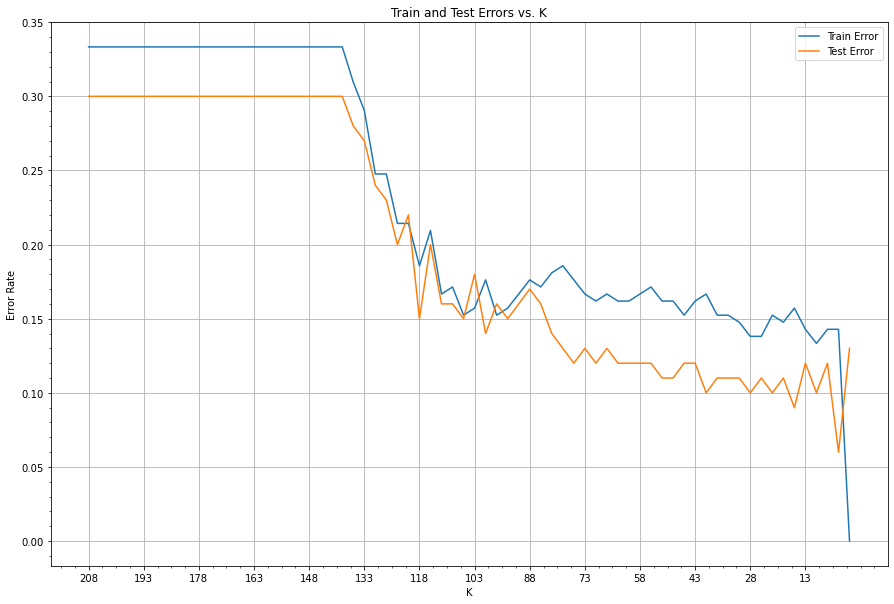

In [26]:
# Define a list of k values in reverse order
k_values = list(range(208, 0, -3))  #I used 140 max since after this point there's no meaninful plot

# Initialize lists to store train and test errors
train_errors = []
test_errors = []

# Loop through each k value
for k in k_values:
    # Initialize the KNN classifier with the current k value "n_neighbors is number of neighbors you take"
    knn = KNeighborsClassifier(n_neighbors=k)

    # Split your training data into features (X_tr) and the target variable (y_tr)
    X_tr = tr_set.drop('class', axis=1)
    y_tr = tr_set['class']

    # Split your test data into features (X_te) and the target variable (y_te)
    X_te = te_set.drop('class', axis=1)
    y_te = te_set['class']

    # Fit the classifier on the training data
    knn.fit(X_tr, y_tr)

    # Predict the class labels by majority voting
    y_tr_pred = knn.predict(X_tr)
    y_te_pred = knn.predict(X_te)
    
    # Calculate errors as 1 - accuracy
    tr_error = 1 - accuracy_score(y_tr, y_tr_pred)
    te_error = 1 - accuracy_score(y_te, y_te_pred)

    # Append errors to the lists
    train_errors.append(tr_error)
    test_errors.append(te_error)

# Reverse the k-values for plotting
k_values = k_values[::-1]

# Plot train and test errors in terms of k
plt.figure(figsize=(15,10))

plt.plot(k_values, train_errors, label='Train Error')
plt.plot(k_values, test_errors, label='Test Error')

plt.grid()
plt.minorticks_on()
plt.title('Train and Test Errors vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()

# Set x-ticks manually in reverse order
step = 5
plt.xticks(k_values[::step], k_values[::-step])

plt.show()

Memo: "Your estimate in high dimensional spaces is lousy. However, the great thing with this is that estimates of probabilities may be lousy.
Estimates of class are not as lousy. So you make your probability you're calculating the probabilities bad.
You cannot rely on it much. However, the class, whether you are whether the class that you estimate is more robust, is more reliable."

It seemed k=21 is in the sweetspot

In [27]:
from sklearn.metrics import confusion_matrix

# Initialize the KNN classifier with the suitable k value "n_neighbors is number of neighbors you take"
knn2 = KNeighborsClassifier(n_neighbors=21)

# refit with new k value
knn2.fit(X_tr, y_tr)

# then predict again
y_te_pred_best = knn2.predict(X_te)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_te, y_te_pred_best)

'''[[True Negative (TN)  False Positive (FP)]
 [False Negative (FN)  True Positive (TP)]]'''

print("Confusion Matrix:")
print(conf_matrix)

# Calculate True Positive Rate (TPR)
TP = conf_matrix[1][1]
FN = conf_matrix[1][0]
TPR = TP / (TP + FN)

# Calculate True Negative Rate (TNR)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
TNR = TN / (TN + FP)

# Calculate Precision
Precision = TP / (TP + FP)

# Calculate F1-Score
F1_Score = 2 * (Precision * TPR) / (Precision + TPR)

# Print the metrics
print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"True Negative Rate (TNR): {TNR:.2f}")
print(f"Precision: {Precision:.2f}")
print(f"F1-Score: {F1_Score:.2f}")

Confusion Matrix:
[[21  9]
 [ 1 69]]
True Positive Rate (TPR): 0.99
True Negative Rate (TNR): 0.70
Precision: 0.88
F1-Score: 0.93


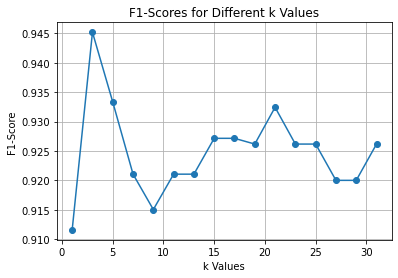

In [28]:
# to see the F1-score along the different k values I created a plot

from sklearn.metrics import f1_score

k_values = list(range(1, 33, 2))  

# Initialize an empty list to store F1-scores
f1_scores = []

# Loop through each k value
for k in k_values:
    # Initialize the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the KNN classifier on your training data
    knn.fit(X_tr, y_tr)

    # Make predictions on the test data
    y_te_pred = knn.predict(X_te)

    # Calculate the F1-score
    f1 = f1_score(y_te, y_te_pred)

    # Append the F1-score to the list
    f1_scores.append(f1)

# Print the F1-scores

plt.plot(k_values, f1_scores, marker='o')
plt.title('F1-Scores for Different k Values')
plt.xlabel('k Values')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()

#### iii. Learning Curve

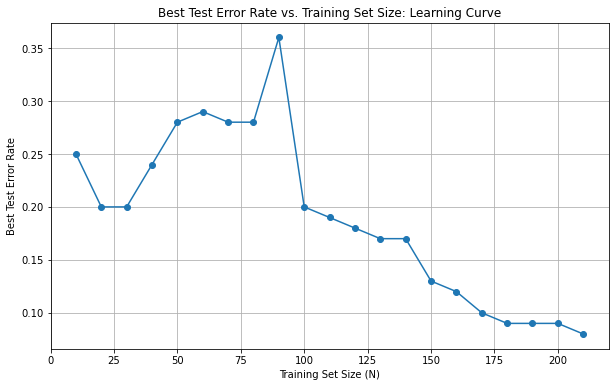

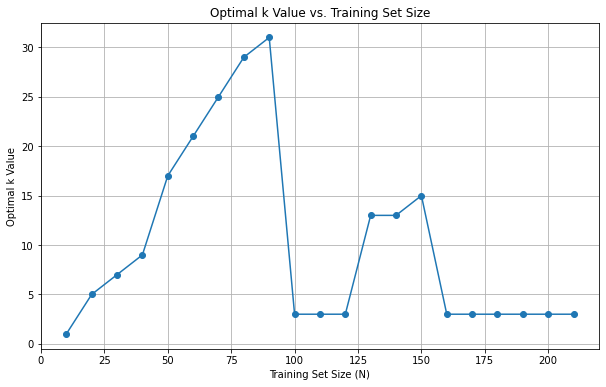

In [29]:
# Initialize an empty list to store the best test error rates, optimal k values
best_test_errors = []
optimal_k_values = []

def find_optimal_k(X_tr, y_tr, X_te, k_values):
    best_error_rate = 1.0  # Initialize with a high value
    best_k = None

    for k in k_values:
        if k <= len(X_tr):  # Check if k is valid for the training set size
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_tr, y_tr)
            te_error = 1 - knn.score(X_te, y_te)

            if te_error < best_error_rate:
                best_error_rate = te_error
                best_k = k

    return best_error_rate, best_k

# Define a range of training set sizes from 10 to 210 with a step of 10
training_set_sizes = list(range(10, 211, 10))

# Loop through each training set size
for N in training_set_sizes:
    n_samples_class_0 = N // 3
    n_samples_class_1 = N - n_samples_class_0

    class_0_subset = df_bin[df_bin['class'] == 0].iloc[:n_samples_class_0]
    class_1_subset = df_bin[df_bin['class'] == 1].iloc[:n_samples_class_1]

    selected_training_set = pd.concat([class_0_subset, class_1_subset])

    X_tr = selected_training_set.drop('class', axis=1)
    y_tr = selected_training_set['class']

    best_error, best_k = find_optimal_k(X_tr, y_tr, X_te, k_values)

    best_test_errors.append(best_error)
    optimal_k_values.append(best_k)

# Plot the best test error rates against the training set sizes
plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, best_test_errors, marker='o')
plt.title('Best Test Error Rate vs. Training Set Size: Learning Curve')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, optimal_k_values, marker='o')
plt.title('Optimal k Value vs. Training Set Size')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Optimal k Value')
plt.grid(True)
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

"For example, this means that the Manhattan distance metric (L1 norm) is consistently more preferable than the
Euclidean distance metric (L2 norm) for high dimensional data mining
applications. Using the intuition derived from our analysis, we introduce
and examine a natural extension of the Lk norm to fractional distance
metrics. We show that the fractional distance metric provides more meaningful results both from the theoretical and empirical perspective. The
results show that fractional distance metrics can significantly improve
the effectiveness of standard clustering algorithms such as the k-means
algorithm." (On the Surprising Behavior of Distance Metrics
in High Dimensional Space)

     Training Errors  Test Errors
1           0.000000         0.11
6           0.138095         0.11
11          0.142857         0.11
16          0.133333         0.12
21          0.147619         0.12
26          0.166667         0.11
31          0.166667         0.12
36          0.161905         0.13
41          0.166667         0.13
46          0.171429         0.13
51          0.171429         0.14
56          0.185714         0.13
61          0.176190         0.15
66          0.185714         0.15
71          0.176190         0.14
76          0.180952         0.14
81          0.166667         0.16
86          0.152381         0.15
91          0.176190         0.20
96          0.176190         0.20
101         0.200000         0.22
106         0.204762         0.21
111         0.219048         0.23
116         0.228571         0.21
121         0.242857         0.22
126         0.261905         0.24
131         0.304762         0.28
136         0.323810         0.28
141         0.

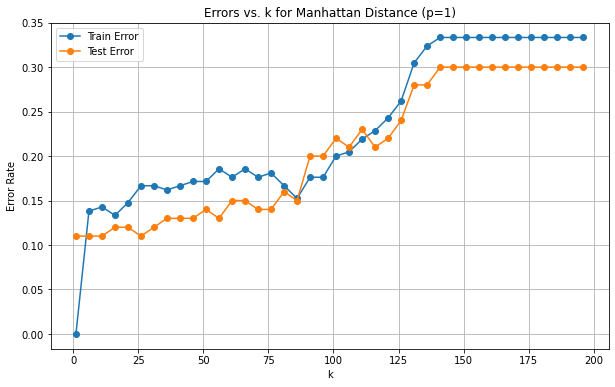

In [30]:
from sklearn.metrics import accuracy_score

k_values = list(range(1, 197, 5))

# Initialize a list to store test errors
tr_errors_minkowski = []
test_errors_minkowski = []

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)  # Minkowski with p=1 is Manhattan

    # Fit the KNN classifier on the training data
    knn.fit(X_tr, y_tr)
    y_tr_man_pred = knn.predict(X_tr)
    y_te_man_pred = knn.predict(X_te)
    
    tr_error = 1 - accuracy_score(y_tr, y_tr_man_pred)
    te_error = 1 - accuracy_score(y_te, y_te_man_pred)

    tr_errors_minkowski.append(tr_error)
    test_errors_minkowski.append(te_error)

# Create a DataFrame to summarize the errors
error_summary = pd.DataFrame({'Training Errors': tr_errors_minkowski, 'Test Errors': test_errors_minkowski}, index=k_values)

# Find the best k
best_k_tr = k_values[np.argmin(tr_errors_minkowski)]
best_k_te = k_values[np.argmin(test_errors_minkowski)]
best_tr_error = min(tr_errors_minkowski)
best_test_error = min(test_errors_minkowski)

# Display the error summary
print(error_summary)
print(f"\nBest k Value for Manhattan Distance of training (p=1): {best_k_tr} when error:{best_tr_error:.3f}")
print(f"\nBest k Value for Manhattan Distance of testing (p=1): {best_k_te} when error:{best_test_error:.3f}")

# Display the summary table of test errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, tr_errors_minkowski, marker='o', label='Train Error')
plt.plot(k_values, test_errors_minkowski, marker='o', label='Test Error')
plt.title('Errors vs. k for Manhattan Distance (p=1)')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

     Training Errors  Test Errors
0.1         0.138095         0.09
0.2         0.147619         0.09
0.3         0.147619         0.08
0.4         0.152381         0.08
0.5         0.147619         0.08
0.6         0.152381         0.06
0.7         0.152381         0.07
0.8         0.147619         0.08
0.9         0.147619         0.09
1.0         0.133333         0.09

Best log P Value for log of training (p=1): 1.0 when error: 0.133

Best log P Value for log of testing (p=1): 0.6 when error: 0.060


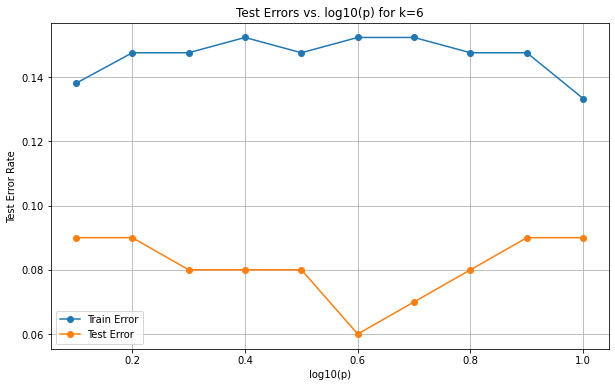

In [31]:
log_p_values = np.arange(0.1, 1.1, 0.1)  # Range from 0.1 to 1.0 in steps of 0.1

tr_errors_log = []
test_errors_log = []
log_p_values_list = []

for log_p in log_p_values:
    # Calculate the actual value of p
    p = 10 ** log_p

    # Initialize the KNN classifier with the current p value and k=6
    knn = KNeighborsClassifier(n_neighbors=6, p=p)

    # Fit the KNN classifier on the training data (X_tr, y_tr)
    knn.fit(X_tr, y_tr)

    # Make predictions on the test data (X_te)
    y_tr_log_pred = knn.predict(X_tr)
    y_te_log_pred = knn.predict(X_te)

    # Calculate the test error rate as 1 - accuracy
    tr_error = 1 - accuracy_score(y_tr, y_tr_log_pred)
    te_error = 1 - accuracy_score(y_te, y_te_log_pred)

    # Append the test error rate and log_p value to the lists
    tr_errors_log.append(tr_error)
    test_errors_log.append(te_error)
    log_p_values_list.append(log_p)

# Create a DataFrame to summarize the errors
error_summary_log = pd.DataFrame({'Training Errors': tr_errors_log, 'Test Errors': test_errors_log}, index=log_p_values_list)

best_log_p_tr = log_p_values_list[np.argmin(tr_errors_log)]
best_log_p_te = log_p_values_list[np.argmin(test_errors_log)]
best_tr_error = min(tr_errors_log)
best_test_error = min(test_errors_log)

# Display the best log10(p) and its corresponding test error
print(error_summary_log)

print(f"\nBest log P Value for log of training (p=1): {best_log_p_tr} when error: {best_tr_error:.3f}")
print(f"\nBest log P Value for log of testing (p=1): {best_log_p_te} when error: {best_test_error:.3f}")

# Plot log10(p) versus test errors
plt.figure(figsize=(10, 6))
plt.plot(log_p_values_list, tr_errors_log, marker='o', label='Train Error')
plt.plot(log_p_values_list, test_errors_log, marker='o', label='Test Error')
plt.title('Test Errors vs. log10(p) for k=6')
plt.xlabel('log10(p)')
plt.ylabel('Test Error Rate')
plt.legend()
plt.grid(True)
plt.show()

##### C. Chebyshev Distance With p -> infinity.

     Training Errors  Test Errors
1           0.000000         0.13
6           0.152381         0.10
11          0.161905         0.12
16          0.147619         0.08
21          0.133333         0.11
26          0.157143         0.12
31          0.142857         0.12
36          0.157143         0.10
41          0.142857         0.13
46          0.161905         0.12
51          0.166667         0.12
56          0.166667         0.12
61          0.176190         0.14
66          0.161905         0.13
71          0.180952         0.14
76          0.176190         0.11
81          0.171429         0.14
86          0.171429         0.12
91          0.161905         0.15
96          0.161905         0.14
101         0.171429         0.19
106         0.171429         0.18
111         0.180952         0.18
116         0.176190         0.18
121         0.209524         0.21
126         0.223810         0.21
131         0.247619         0.25
136         0.319048         0.28
141         0.

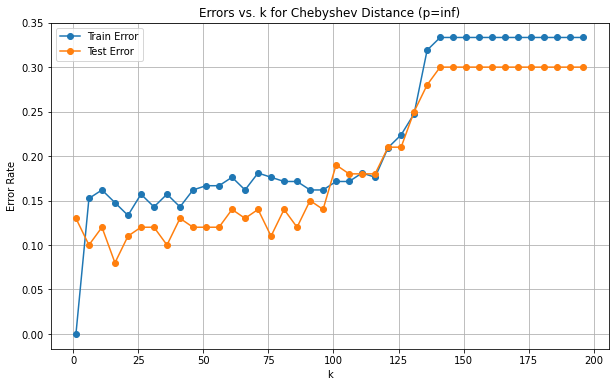

In [32]:
# Initialize a list to store test errors
tr_errors_che = []
test_errors_che = []

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=np.inf)  # Minkowski with p=np.inf is Chebyshev 

    # Fit the KNN classifier on the training data
    knn.fit(X_tr, y_tr)
    
    y_tr_che_pred = knn.predict(X_tr)
    y_te_che_pred = knn.predict(X_te)
    
    tr_error_che = 1 - accuracy_score(y_tr, y_tr_che_pred)
    te_error_che = 1 - accuracy_score(y_te, y_te_che_pred)

    tr_errors_che.append(tr_error_che)
    test_errors_che.append(te_error_che)

# Create a DataFrame to summarize the errors
error_summary_che = pd.DataFrame({'Training Errors': tr_errors_che, 'Test Errors': test_errors_che}, index=k_values)

# Find the best k
best_k_tr_che = k_values[np.argmin(tr_errors_che)]
best_k_te_che = k_values[np.argmin(test_errors_che)]
best_tr_error_che = min(tr_errors_che)
best_test_error_che = min(test_errors_che)

# Display the error summary
print(error_summary_che)
print(f"\nBest k Value for Chebyshev by training: {best_k_tr_che} when error: {best_tr_error_che:.3f}")
print(f"\nBest k Value for Chebyshev by testing: {best_k_te_che} when error: {best_test_error_che:.3f}")

# Display the summary table of test errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, tr_errors_che, marker='o', label='Train Error')
plt.plot(k_values, test_errors_che, marker='o', label='Test Error')
plt.title('Errors vs. k for Chebyshev Distance (p=inf)')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

#### ii. Mahalanobis Distance.

     Training Errors  Test Errors
1           0.000000         0.16
6           0.133333         0.14
11          0.157143         0.17
16          0.157143         0.18
21          0.152381         0.20
26          0.176190         0.19
31          0.166667         0.19
36          0.166667         0.18
41          0.180952         0.21
46          0.171429         0.22
51          0.171429         0.21
56          0.176190         0.20
61          0.176190         0.24
66          0.166667         0.22
71          0.171429         0.24
76          0.166667         0.21
81          0.171429         0.22
86          0.185714         0.22
91          0.204762         0.23
96          0.209524         0.24
101         0.219048         0.25
106         0.219048         0.24
111         0.271429         0.25
116         0.276190         0.28
121         0.319048         0.28
126         0.328571         0.29
131         0.333333         0.30
136         0.333333         0.30
141         0.

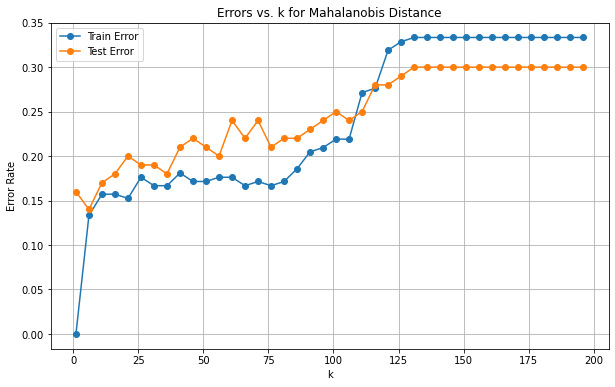

In [33]:
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

# Initialize a list to store test errors
tr_errors_mahal = []
test_errors_mahal = []

# Initialize variables to track the best test error rate and the corresponding k
best_tr_error_rate = 1.0  # Initialize with a high value
best_te_error_rate = 1.0  # Initialize with a high value
best_k_te = None
best_k_tr = None

# Loop through different values of k
for k in k_values:
    # Calculate the inverse of the covariance matrix
    cov_inv = np.linalg.inv(np.cov(X_tr.T))
    
    # Initialize KNN classifier with custom Mahalanobis Distance metric
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': cov_inv})

    # Fit the KNN classifier on the training data
    knn.fit(X_tr, y_tr)
  
    # Make predictions on the test data
    y_tr_pred_mahal = knn.predict(X_tr)
    y_te_pred_mahal = knn.predict(X_te)

    # Calculate the test error rate as 1 - accuracy
    tr_error = 1 - accuracy_score(y_tr, y_tr_pred_mahal)
    te_error = 1 - accuracy_score(y_te, y_te_pred_mahal)

    tr_errors_mahal.append(tr_error)
    test_errors_mahal.append(te_error)
    
    # Check if the current test error is the best so far
    if tr_error < best_tr_error_rate:
        best_tr_error_rate = tr_error
        best_k_tr = k

    if te_error < best_te_error_rate:
        best_te_error_rate = te_error
        best_k_te = k

# Create a DataFrame to summarize the test errors
error_summary_mahal = pd.DataFrame({'Training Errors': tr_errors_mahal, 'Test Errors': test_errors_mahal}, index=k_values)

# Display the summary table of test errors
print(error_summary_mahal)

# Display the best k value for Mahalanobis Distance
print(f"\nBest k Value for Mahalanobis Distance: {best_k_tr} with Training Error: {best_tr_error_rate:.3f}")
print(f"\nBest k Value for Mahalanobis Distance: {best_k_te} with Test Error: {best_te_error_rate:.3f}")

# Display the summary table of test errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, tr_errors_mahal, marker='o', label='Train Error')
plt.plot(k_values, test_errors_mahal, marker='o', label='Test Error')
plt.title('Errors vs. k for Mahalanobis Distance')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.show()

### (e) Weighted Decision

The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is inversely proportional to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k ∈ {1, 6, 11, 16, . . . , 196}

Test Errors

In [34]:
# Define the distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [35]:
# Initialize a dictionary to store test errors for each metric and voting type

test_errors = {metric: {'majority_polling': [], 'weighted_voting': []} for metric in distance_metrics}

# Initialize dictionaries to store the best k values for each metric
best_k_values_majority = {metric: None for metric in distance_metrics}
best_k_values_weighted = {metric: None for metric in distance_metrics}

# Loop through each distance metric
for metric in distance_metrics:
    # Initialize empty lists to store test errors for the current metric and voting type

    metric_test_errors_majority = []
    metric_test_errors_weighted = []

    # Initialize variables to track the best test error rate and the corresponding k

    best_error_rate_majority = 1.0  # Initialize with a high value
    best_k_majority = None
    best_error_rate_weighted = 1.0  # Initialize with a high value
    best_k_weighted = None

    # Loop through different values of k
    for k in k_values:
        # Initialize KNN classifiers with the current metric and k value

        knn_majority = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_weighted = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

        # Fit the KNN classifiers on the training data
        knn_majority.fit(X_tr, y_tr)
        knn_weighted.fit(X_tr, y_tr)

        # Make predictions on the test data for majority polling, weighted voting
        y_pred_majority = knn_majority.predict(X_te)
        y_pred_weighted = knn_weighted.predict(X_te)

        # Calculate the test error rates for majority polling and weighted voting
        te_error_majority = 1 - accuracy_score(y_te, y_pred_majority)
        te_error_weighted = 1 - accuracy_score(y_te, y_pred_weighted)

        # Append the test errors to the respective lists
        metric_test_errors_majority.append(te_error_majority)
        metric_test_errors_weighted.append(te_error_weighted)

        # Check if the current error rate is the best so far for majority polling
        if te_error_majority < best_error_rate_majority:
            best_error_rate_majority = te_error_majority
            best_k_majority = k

        # Check if the current error rate is the best so far for weighted voting
        if te_error_weighted < best_error_rate_weighted:
            best_error_rate_weighted = te_error_weighted
            best_k_weighted = k

    # Store the errors for the current metric and voting types in the dictionary
    test_errors[metric]['majority_polling'] = metric_test_errors_majority
    test_errors[metric]['weighted_voting'] = metric_test_errors_weighted

    # Store the best k values in the dictionaries
    best_k_values_majority[metric] = best_k_majority
    best_k_values_weighted[metric] = best_k_weighted

# Create DataFrames to summarize the errors for majority polling and weighted voting
test_error_summary_majority = pd.DataFrame({metric: test_errors[metric]['majority_polling'] for metric in distance_metrics}, index=k_values)
test_error_summary_weighted = pd.DataFrame({metric: test_errors[metric]['weighted_voting'] for metric in distance_metrics}, index=k_values)

Test Error Summary for Majority Polling:
     euclidean  manhattan  chebyshev  minkowski
1         0.13       0.11       0.13       0.13
6         0.08       0.11       0.10       0.08
11        0.12       0.11       0.12       0.12
16        0.09       0.12       0.08       0.09
21        0.10       0.12       0.11       0.10
26        0.11       0.11       0.12       0.11
31        0.11       0.12       0.12       0.11
36        0.11       0.13       0.10       0.11
41        0.11       0.13       0.13       0.11
46        0.12       0.13       0.12       0.12
51        0.11       0.14       0.12       0.11
56        0.12       0.13       0.12       0.12
61        0.12       0.15       0.14       0.12
66        0.13       0.15       0.13       0.13
71        0.13       0.14       0.14       0.13
76        0.12       0.14       0.11       0.12
81        0.13       0.16       0.14       0.13
86        0.16       0.15       0.12       0.16
91        0.16       0.20       0.15       0.16

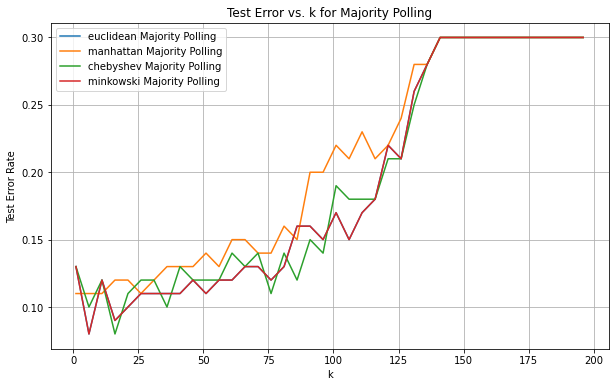


Best k Values for Each Metric in Majority Polling:
{'euclidean': 6, 'manhattan': 1, 'chebyshev': 16, 'minkowski': 6}


In [36]:
# Display the summary tables of test errors for majority polling and weighted voting
print("Test Error Summary for Majority Polling:")
print(test_error_summary_majority)

plt.figure(figsize=(10, 6))
for metric in distance_metrics:
    plt.plot(k_values, test_error_summary_majority[metric], label=f'{metric} Majority Polling')

plt.title('Test Error vs. k for Majority Polling')
plt.xlabel('k')
plt.ylabel('Test Error Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display the best k values for each distance metric in Majority Polling
print("\nBest k Values for Each Metric in Majority Polling:")
print(best_k_values_majority)

Test Error Summary for Weighted Voting:
     euclidean  manhattan  chebyshev  minkowski
1         0.13       0.11       0.13       0.13
6         0.10       0.11       0.13       0.10
11        0.12       0.11       0.12       0.12
16        0.11       0.12       0.11       0.11
21        0.11       0.11       0.12       0.11
26        0.11       0.10       0.12       0.11
31        0.11       0.11       0.11       0.11
36        0.11       0.11       0.11       0.11
41        0.11       0.11       0.11       0.11
46        0.11       0.11       0.12       0.11
51        0.11       0.12       0.12       0.11
56        0.11       0.12       0.12       0.11
61        0.11       0.13       0.11       0.11
66        0.11       0.13       0.13       0.11
71        0.11       0.11       0.12       0.11
76        0.12       0.12       0.12       0.12
81        0.12       0.14       0.12       0.12
86        0.13       0.14       0.14       0.13
91        0.14       0.13       0.13       0.14


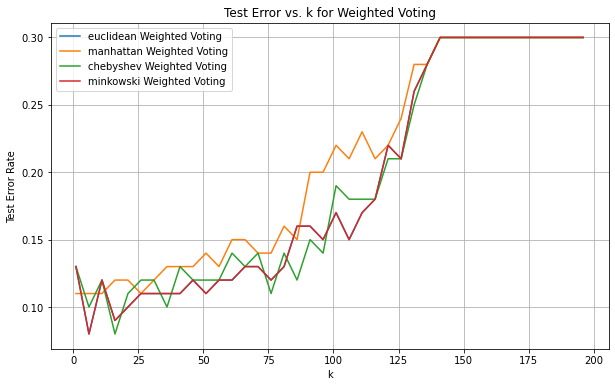


Best k Values for Each Metric in Weighted Voting:
{'euclidean': 6, 'manhattan': 26, 'chebyshev': 16, 'minkowski': 6}


In [37]:
# Display the summary tables of test errors for majority polling and weighted voting
print("Test Error Summary for Weighted Voting:")
print(test_error_summary_weighted)

plt.figure(figsize=(10, 6))
for metric in distance_metrics:
    plt.plot(k_values, test_error_summary_majority[metric], label=f'{metric} Weighted Voting')

plt.title('Test Error vs. k for Weighted Voting')
plt.xlabel('k')
plt.ylabel('Test Error Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display the best k values for each distance metric in weighted voting
print("\nBest k Values for Each Metric in Weighted Voting:")
print(best_k_values_weighted)

Training Errors

In [44]:
# Initialize a dictionary to store training errors for each metric and voting type

train_errors = {metric: {'majority_polling_tr': [], 'weighted_voting_tr': []} for metric in distance_metrics}

# Initialize dictionaries to store the best k values for each metric
best_k_values_majority_tr = {metric: None for metric in distance_metrics}
best_k_values_weighted_tr = {metric: None for metric in distance_metrics}

# Loop through each distance metric
for metric in distance_metrics:
    # Initialize empty lists to store training errors for the current metric and voting type
    metric_train_errors_majority = []
    metric_train_errors_weighted = []

    # Initialize variables to track the best training error rate and the corresponding k
    best_error_rate_majority_tr = 1.0  # Initialize with a high value
    best_k_majority_tr = None
    best_error_rate_weighted_tr = 1.0  # Initialize with a high value
    best_k_weighted_tr = None

    # Loop through different values of k
    for k in k_values:
        # Initialize KNN classifiers with the current metric and k value
        knn_majority = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_weighted = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='uniform') 
        # to compute training errors for weighted voting while keeping the test set separate, you should fit the model with weights='uniform' during training and then calculate training errors based on this model's predictions.

        # Fit the KNN classifiers on the training data
        knn_majority.fit(X_tr, y_tr)
        knn_weighted.fit(X_tr, y_tr)

        # Make predictions on the training data for majority polling, weighted voting
        y_pred_majority_tr = knn_majority.predict(X_tr)
        y_pred_weighted_tr = knn_weighted.predict(X_tr)

        # Calculate the training error rates for majority polling and weighted voting
        train_error_majority_tr = 1 - accuracy_score(y_tr, y_pred_majority_tr)
        train_error_weighted_tr = 1 - accuracy_score(y_tr, y_pred_weighted_tr)

        # Append the training errors to the respective lists
        metric_train_errors_majority.append(train_error_majority_tr)
        metric_train_errors_weighted.append(train_error_weighted_tr)


        # Check if the current error rate is the best so far for majority polling
        if train_error_majority_tr < best_error_rate_majority_tr:
            best_error_rate_majority_tr = train_error_majority_tr
            best_k_majority_tr = k

        # Check if the current error rate is the best so far for weighted voting
        if train_error_weighted_tr < best_error_rate_weighted_tr:
            best_error_rate_weighted_tr = train_error_weighted_tr
            best_k_weighted_tr = k

    # Store the errors for the current metric and voting types in the dictionary
    train_errors[metric]['majority_polling_tr'] = metric_train_errors_majority
    train_errors[metric]['weighted_voting_tr'] = metric_train_errors_weighted

    # Store the best k values in the dictionaries
    best_k_values_majority_tr[metric] = best_k_majority_tr
    best_k_values_weighted_tr[metric] = best_k_weighted_tr

# Create DataFrames to summarize the errors for majority polling and weighted voting
tr_error_summary_majority = pd.DataFrame({metric: train_errors[metric]['majority_polling_tr'] for metric in distance_metrics}, index=k_values)
tr_error_summary_weighted = pd.DataFrame({metric: train_errors[metric]['weighted_voting_tr'] for metric in distance_metrics}, index=k_values)

Training Error Summary for Majority Polling:
     euclidean  manhattan  chebyshev  minkowski
1     0.000000   0.000000   0.000000   0.000000
6     0.147619   0.138095   0.152381   0.147619
11    0.147619   0.142857   0.161905   0.147619
16    0.157143   0.133333   0.147619   0.157143
21    0.138095   0.147619   0.133333   0.138095
26    0.142857   0.166667   0.157143   0.142857
31    0.147619   0.166667   0.142857   0.147619
36    0.161905   0.161905   0.157143   0.161905
41    0.161905   0.166667   0.142857   0.161905
46    0.152381   0.171429   0.161905   0.152381
51    0.157143   0.171429   0.166667   0.157143
56    0.171429   0.185714   0.166667   0.171429
61    0.161905   0.176190   0.176190   0.161905
66    0.166667   0.185714   0.161905   0.166667
71    0.166667   0.176190   0.180952   0.166667
76    0.176190   0.180952   0.176190   0.176190
81    0.166667   0.166667   0.171429   0.166667
86    0.161905   0.152381   0.171429   0.161905
91    0.166667   0.176190   0.161905   0.16

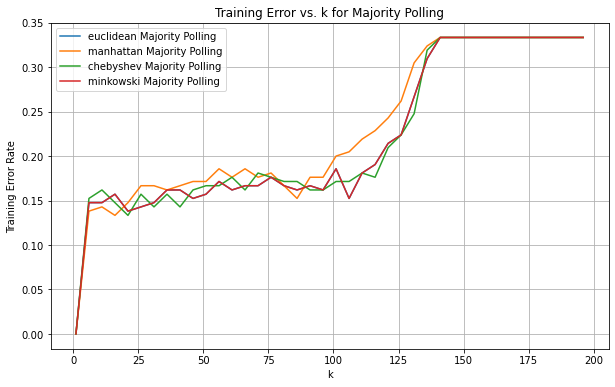


Best k Values for Each Metric in Majority Polling for training:
{'euclidean': 1, 'manhattan': 1, 'chebyshev': 1, 'minkowski': 1}


In [45]:
# Display the summary tables of Training errors for majority polling and weighted voting
print("Training Error Summary for Majority Polling:")
print(tr_error_summary_majority)

plt.figure(figsize=(10, 6))
for metric in distance_metrics:
    plt.plot(k_values, tr_error_summary_majority[metric], label=f'{metric} Majority Polling')

plt.title('Training Error vs. k for Majority Polling')
plt.xlabel('k')
plt.ylabel('Training Error Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display the best k values for each distance metric in Majority Polling
print("\nBest k Values for Each Metric in Majority Polling for training:")
print(best_k_values_majority_tr)

Training Error Summary for Weighted Voting:
     euclidean  manhattan  chebyshev  minkowski
1     0.000000   0.000000   0.000000   0.000000
6     0.147619   0.138095   0.152381   0.147619
11    0.147619   0.142857   0.161905   0.147619
16    0.157143   0.133333   0.147619   0.157143
21    0.138095   0.147619   0.133333   0.138095
26    0.142857   0.166667   0.157143   0.142857
31    0.147619   0.166667   0.142857   0.147619
36    0.161905   0.161905   0.157143   0.161905
41    0.161905   0.166667   0.142857   0.161905
46    0.152381   0.171429   0.161905   0.152381
51    0.157143   0.171429   0.166667   0.157143
56    0.171429   0.185714   0.166667   0.171429
61    0.161905   0.176190   0.176190   0.161905
66    0.166667   0.185714   0.161905   0.166667
71    0.166667   0.176190   0.180952   0.166667
76    0.176190   0.180952   0.176190   0.176190
81    0.166667   0.166667   0.171429   0.166667
86    0.161905   0.152381   0.171429   0.161905
91    0.166667   0.176190   0.161905   0.166

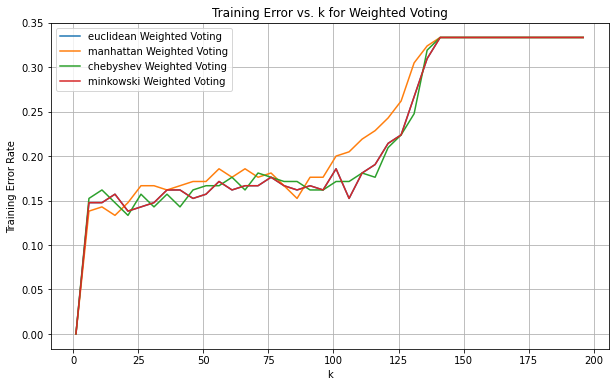


Best k Values for Each Metric in Weighted Voting for training:
{'euclidean': 1, 'manhattan': 1, 'chebyshev': 1, 'minkowski': 1}


In [46]:
# Display the summary tables of weighted errors for majority polling and weighted voting
print("Training Error Summary for Weighted Voting:")
print(tr_error_summary_weighted)

plt.figure(figsize=(10, 6))
for metric in distance_metrics:
    plt.plot(k_values, tr_error_summary_weighted[metric], label=f'{metric} Weighted Voting')

plt.title('Training Error vs. k for Weighted Voting')
plt.xlabel('k')
plt.ylabel('Training Error Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display the best k values for each distance metric in weighted voting
print("\nBest k Values for Each Metric in Weighted Voting for training:")
print(best_k_values_weighted_tr)

### (f) Training Error Rate